# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [32]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

$$
A.T * A * b = A.T * y
$$

In [33]:
import numpy as np

In [34]:
def polynomial(x, m):
    A = np.zeros((len(x), m+1)) 
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            A[i][j] =(x[i])**(j)
    b = np.linalg.solve ((A.T @ A), (A.T @ y))
    return(b)

print(polynomial(x,4))

[ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [ ]:
import matplotlib.pyplot as plt

In [64]:
def sigma(x):
    n = len(x)+1
    sigma = []
    for m in range(len(x)):
        sigma_m = 0
        for k in range(len(x)):
            sigma_m += ((np.polyval(polynomial(x, m)[::-1], x[k]) - y[k])**2)/(n-m)
        sigma.append(np.sqrt(sigma_m))
    return(sigma)


[2.6508335167138153, 2.038022278809972, 1.5093648372868003, 0.10729212072180828, 0.10687394577203616, 0.1070261619687219, 0.10213585232691767, 0.10451599242406975, 0.10061411473615797, 0.10527940450549499, 0.10900275070074066, 0.06560126651216586, 0.07312173423545477, 0.08184735396437735, 0.10000986588785203]


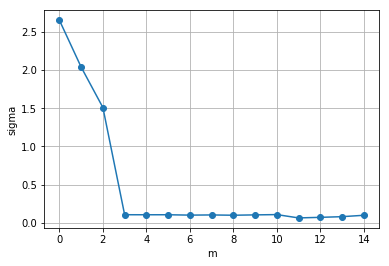

In [78]:
print(sigma(x))
plt.plot([i for i in range(0, len(x))], sigma(x), 'o-')
plt.xlabel('m')
plt.ylabel('sigma')
plt.grid()

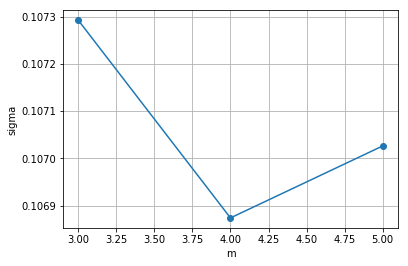

In [73]:
plt.plot([i for i in range(3, 6)], sigma(x)[3:6], 'o-')
plt.xlabel('m')
plt.ylabel('sigma')
plt.grid()

Видно, что оптимальное значение m=4

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

<Figure size 2160x1440 with 0 Axes>

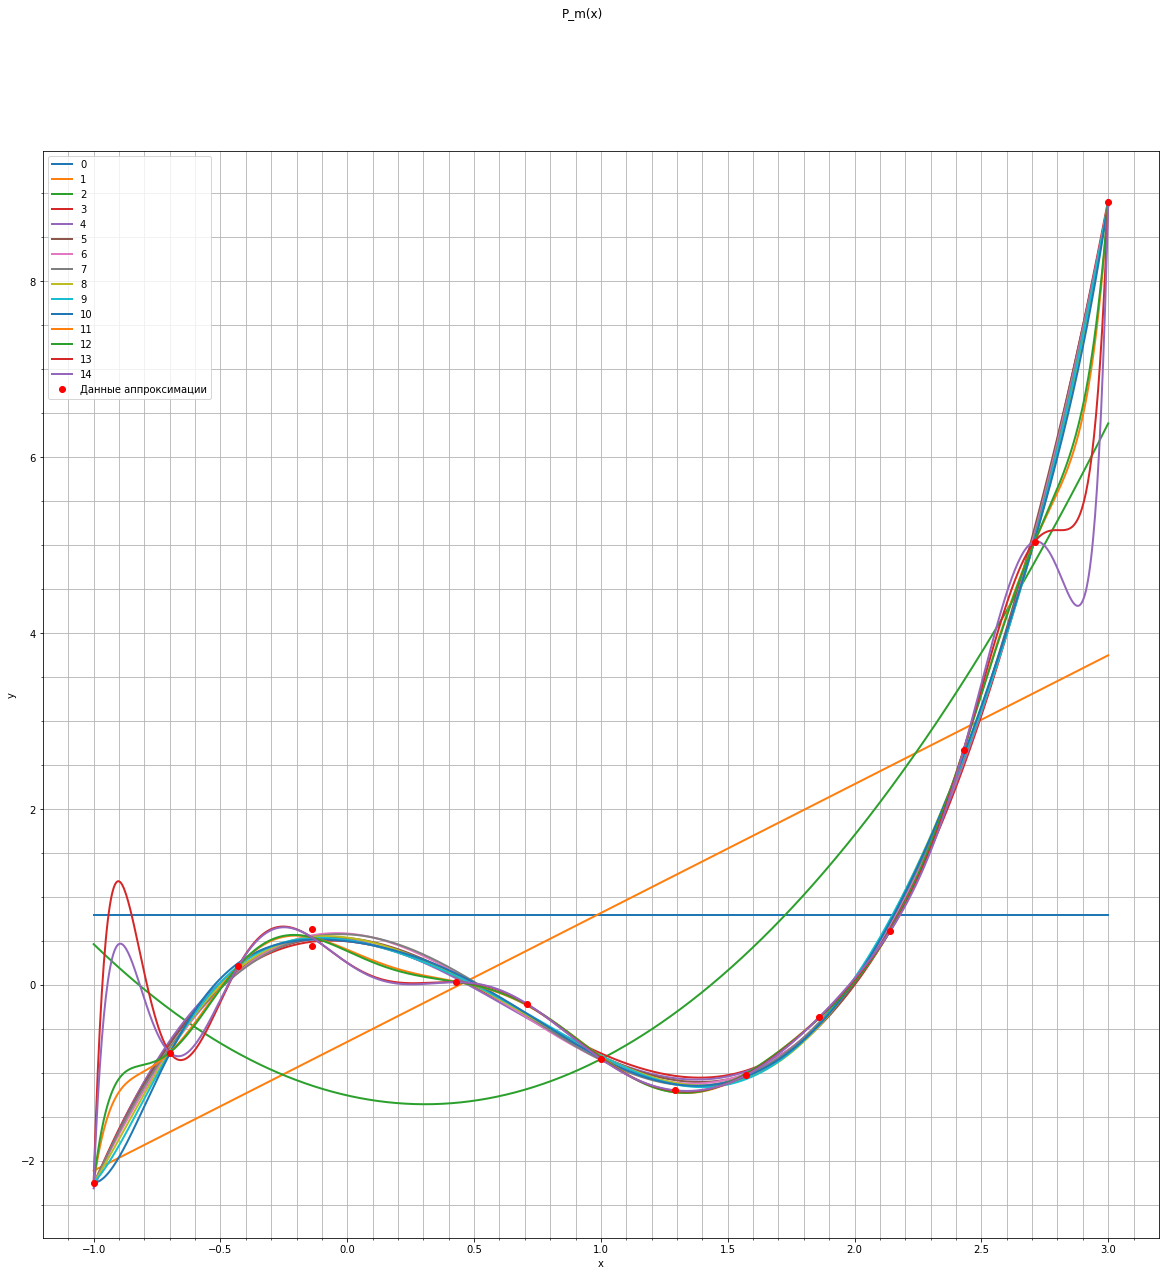

<Figure size 2160x1440 with 0 Axes>

In [124]:
x = np.array(x)
x_p = np.linspace(np.min(x),np.max(x) , 1000)
fig, ax = plt.subplots()

for m in range(len(x)):
    y_p = np.polyval(polynomial(x,m)[::-1], x_p )
    ax.plot(x_p, y_p, linewidth =2, label=m)
    

ax.plot(x, y, 'o', c='red',  label='Данные аппроксимации')
ax.grid(which ='major')
ax.grid(which ='minor')
ax.minorticks_on()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle('P_m(x)')
plt.figure(figsize=(30, 20))

<Figure size 2160x1440 with 0 Axes>

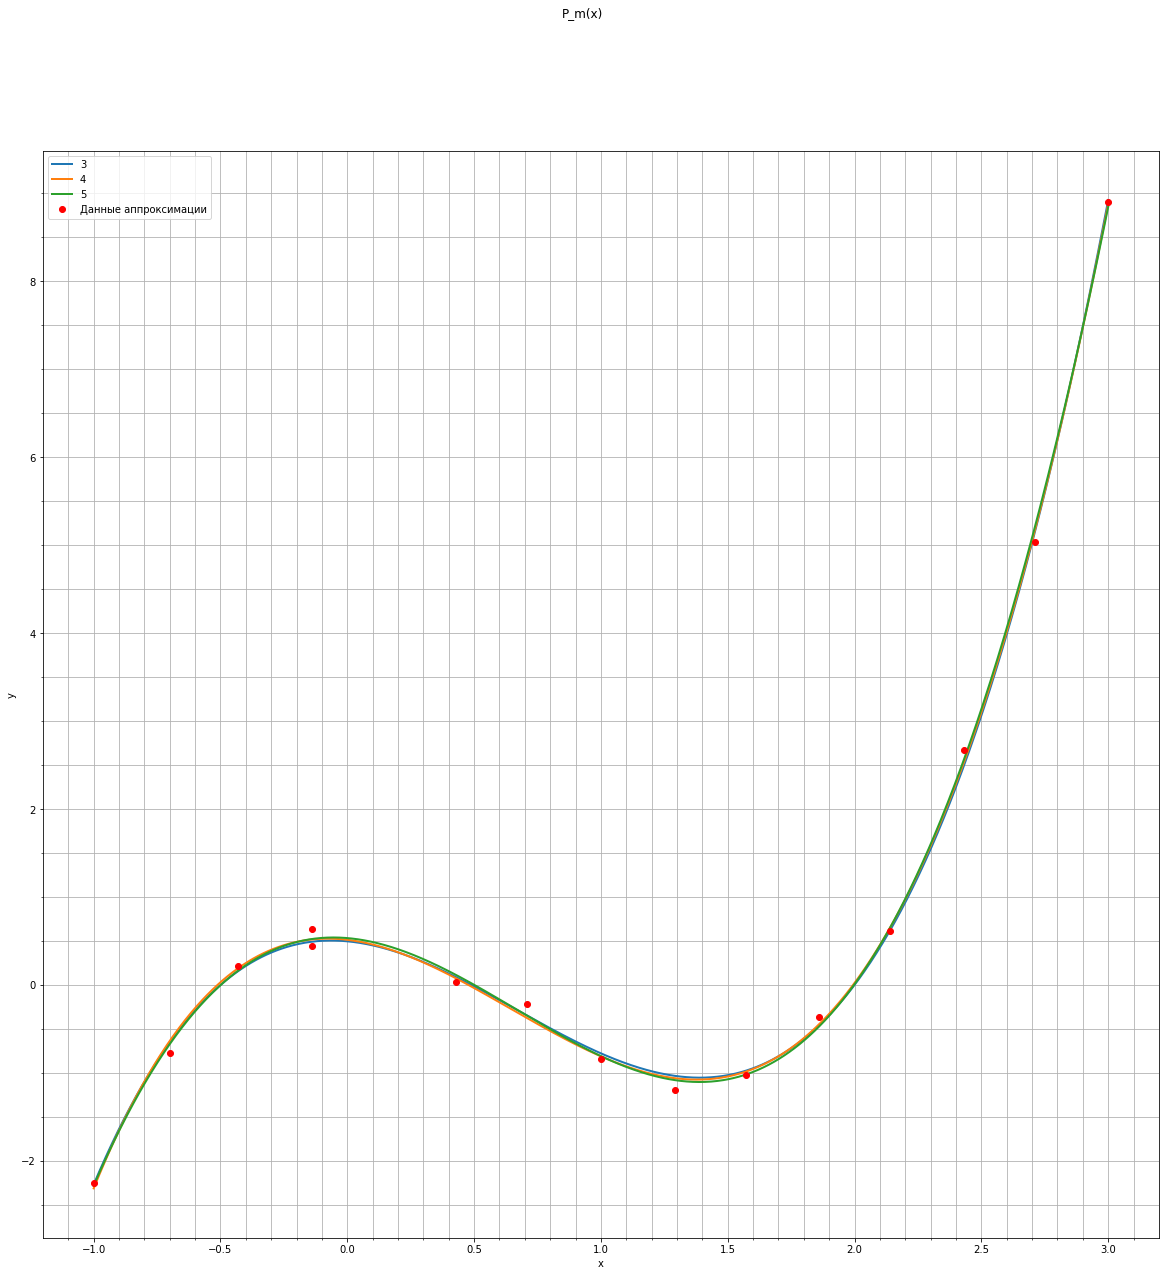

<Figure size 2160x1440 with 0 Axes>

In [134]:
x = np.array(x)
x_p = np.linspace(np.min(x),np.max(x) , 1000)
fig, ax = plt.subplots()

for m in range(3,6):
    y_p = np.polyval(polynomial(x,m)[::-1], x_p )
    ax.plot(x_p, y_p, linewidth =2, label=m)
    

ax.plot(x, y, 'o', c='red',  label='Данные аппроксимации')
ax.grid(which ='major')
ax.grid(which ='minor')
ax.minorticks_on()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle('P_m(x)')
plt.figure(figsize=(30, 20))

<Figure size 2160x1440 with 0 Axes>

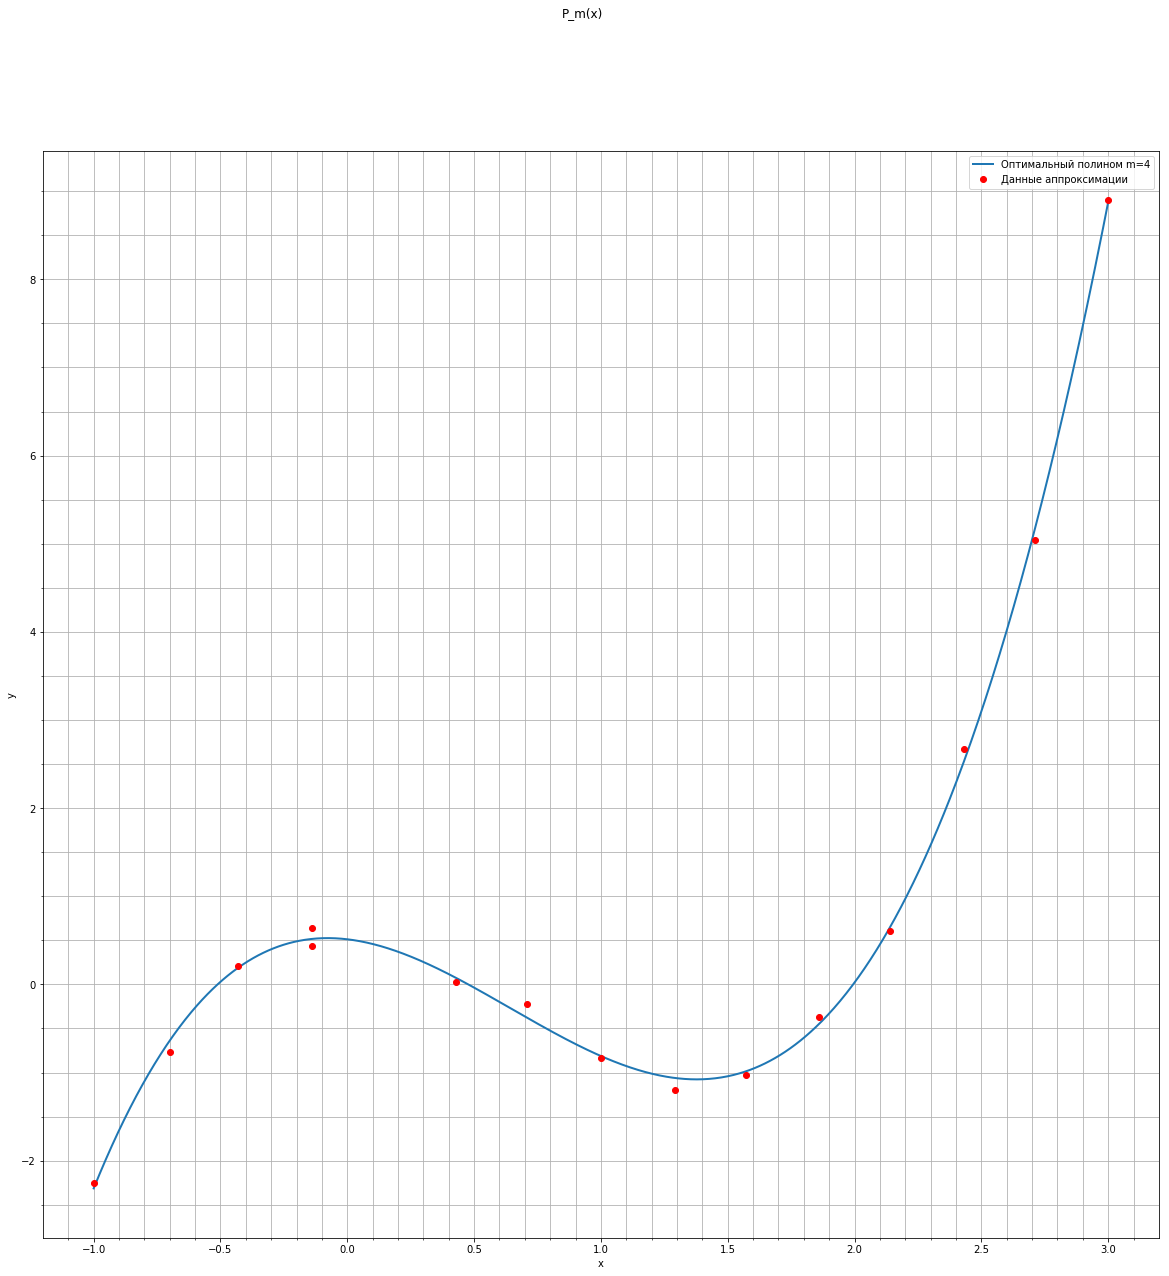

<Figure size 2160x1440 with 0 Axes>

In [139]:
x = np.array(x)
x_p = np.linspace(np.min(x),np.max(x) , 1000)
fig, ax = plt.subplots()


y_p = np.polyval(polynomial(x,4)[::-1], x_p )
ax.plot(x_p, y_p, linewidth =2, label='Оптимальный полином m=4')
    

ax.plot(x, y, 'o', c='red',  label='Данные аппроксимации')
ax.grid(which ='major')
ax.grid(which ='minor')
ax.minorticks_on()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.suptitle('P_m(x)')
plt.figure(figsize=(30, 20))

Видно, что потимальные m лежат в интервале 3-6, как и в прошлом пункте, но наиболее оптимальное m=4, так же как и в прошлом пункте

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [151]:
A = np.zeros((len(x), m+1)) 
for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        A[i][j] =(x[i])**(j)
Q, R = np.linalg.qr(A, mode = 'complete')
b = np.linalg.solve(R[:5], (Q.T @ y)[:5])
print(np.linalg.norm(polynomial(x,4) - b))

2.0460605844719524e-13


Видно, что b_1 и b_2 отличаются на всего на величину -13 порядка

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

m =  1


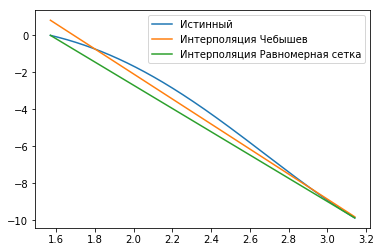

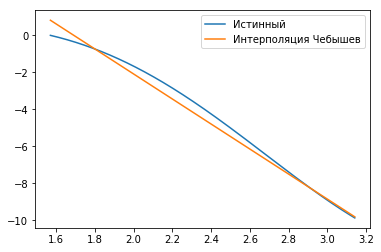

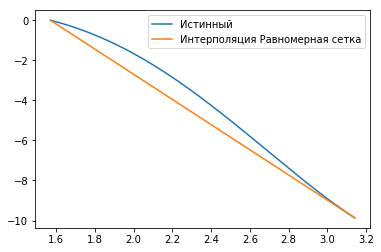

m =  2


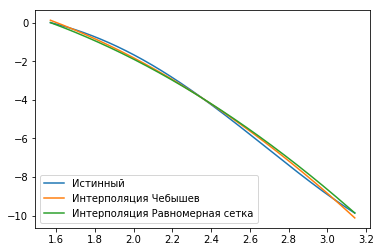

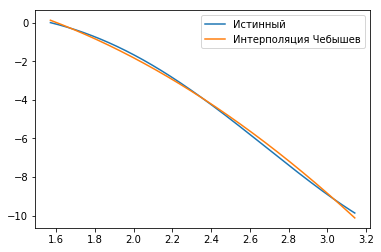

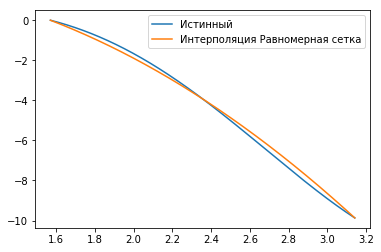

m =  3


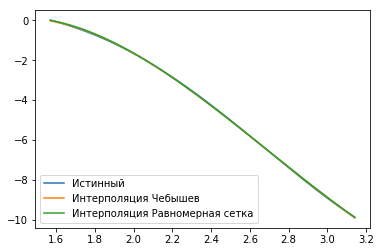

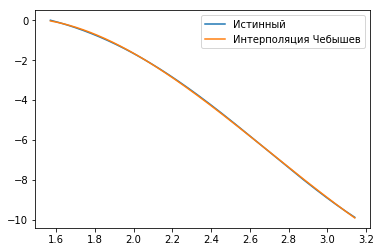

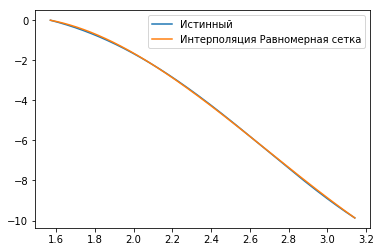

m =  4


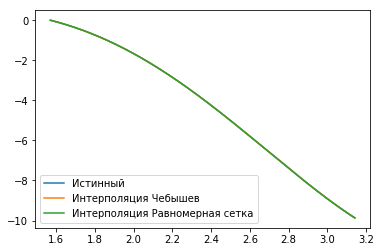

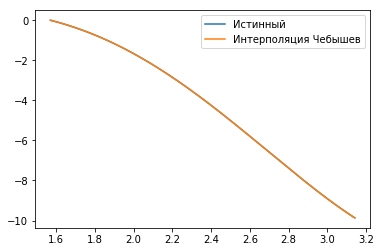

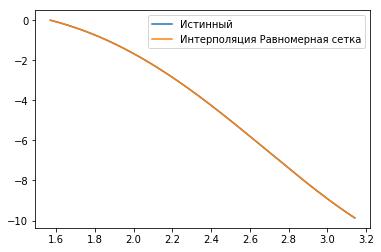

m =  5


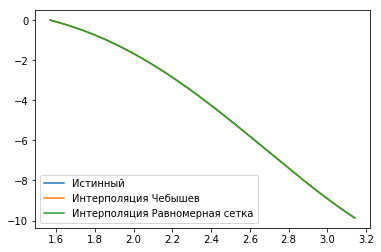

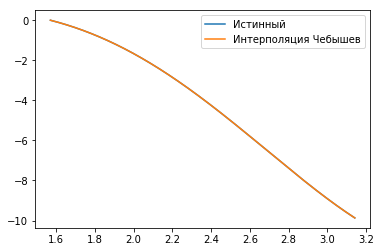

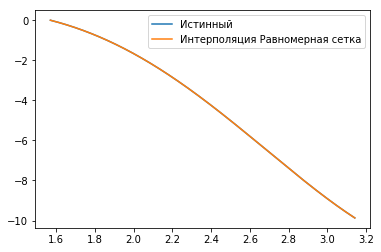

In [193]:
# Интерполяция методом Лагранжа
#1.Полином Лагранжа
def lagrange(a, x, y):
    b = 0
    l = []
    for i in range(len(x)):
        l.append(1)
        for k in range(len(x)):
            if i != k:
                l[i] = l[i] * (a - x[k]) / (x[i] - x[k])
        b = b + y[i] * l[i]
    return b

m=5

for n in range(2,m+2):
    
    #2.Истинный график
    a=np.pi/2   #левая граница интервала
    b=np.pi   #правая граница интервала
    z=np.arange(a,b,0.0001)
    p=z*z*np.cos(z)

    #3.Равномерная сетка
    x=np.linspace(a, b, n)
    y=x*x*np.cos(x)
    yr=lagrange(z,x,y)

    #4.Узлы Чебышева
    k=np.arange(1,n+1)
    xn=(a+b)/2+(b-a)/2*np.cos((2*k-1)/2/n*np.pi)
    yn=xn*xn*np.cos(xn)
    yk=lagrange(z,xn,yn)

    #5.Строим графики 
    print('m = ', n-1)
    plt.plot(z,p,'-') 
    plt.plot(z,yk,'-') 
    plt.plot(z,yr,'-') 
    plt.legend(("Истинный", "Интерполяция Чебышев","Интерполяция Равномерная сетка"))
    plt.show()   
    plt.plot(z,p,'-') 
    plt.plot(z,yk,'-') 
    plt.legend(("Истинный", "Интерполяция Чебышев"))
    plt.show()
    plt.plot(z,p,'-') 
    plt.plot(z,yr,'-') 
    plt.legend(("Истинный","Интерполяция Равномерная сетка"))
    plt.show()